In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data,filters
import scipy.ndimage as ndimage
import numpy as np
from PIL import Image
from math import floor, ceil
import pandas as pd
import cv2
import os

image = plt.imread("greenscreen.jpg")
cat =plt.imread("cat.jpg")
cat_background = cat[130:505,200:700,:]

# Question 1
# Get mask where green is in the threshold and also
# where greens are smaller than either of the other colours
mask = (image[:, :, 1] < 175) | (image[:, :, 2] > image[:, :, 1]) | (image[:, :, 0] > image[:, :, 1])
# Get Inverse mask
un_mask = np.invert(mask)
green = np.zeros_like(image, np.uint8)
green[mask] = image[mask]
def display_1():
    green[un_mask] = cat_background[un_mask]
    plt.axis('off')
    plt.imshow(green)
    
# Question2
grey= Image.open('lena_gray.gif').convert("L")
grey = np.asarray(grey).astype(float)
# Blur image
smoothed_grey = ndimage.gaussian_filter(grey, sigma=(1))
mask = grey - smoothed_grey
masked = grey + mask
smoothed_grey = smoothed_grey.astype(np.uint8)
grey = grey.astype(np.uint8)
mask = mask.astype(np.uint8)
masked = masked.astype(np.uint8)

# display question 2
def display_2():
    plt.axis('off')
    print("Original picture:")
    plt.imshow(grey, cmap='gray', vmin=0, vmax=255)
    plt.show()
    plt.axis('off')
    print("Smoothed with Gaussian filter:")
    plt.imshow(smoothed_grey,cmap='gray', vmin=0, vmax=255)
    plt.show()
    plt.axis('off')
    print("Mask:")
    plt.imshow(mask,cmap='gray', vmin=0, vmax=255)
    plt.show()
    plt.axis('off')
    print("Final Result:")
    plt.imshow(masked,cmap='gray')
    plt.show()

# Question 3
def nn_resize(base_image, scale):
    print("Starting Nearest Neighbour")
    x_scale = int(scale*base_image.shape[0])
    y_scale = int(scale*base_image.shape[1])
    resized = np.zeros((x_scale,y_scale,3),  dtype=np.uint8)
    for x in range(0, x_scale):
        for y in range(0, y_scale):
            x_old = int(round(x/scale))
            if x_old >= base_image.shape[0] - 1:
                x_old = base_image.shape[0] - 1
            y_old = int(round(y/scale))
            if y_old >= base_image.shape[1] - 1:
                y_old = base_image.shape[1] - 1
            resized[x, y, :] =  base_image[x_old,y_old,:]
    print("Done resizing")
    return resized
def display_3_nn():
    # Enlarge
    print("Scale = 3.1")
    large_nn = nn_resize(cat, 3.1)
    cat_nn = large_nn
    plt.imshow(large_nn)
    plt.show()
    plt.imshow(cat)
    plt.show()
    # Enlarge more
    print("Scale = 10")
    large_nn = nn_resize(cat, 10)
    plt.imshow(large_nn)
    plt.show()
    plt.imshow(cat)
    plt.show()
    # Shrink
    print("Scale = 0.9")
    small_nn = nn_resize(cat, 0.9)
    plt.imshow(small_nn)
    plt.show()
    plt.imshow(cat)
    plt.show()
    # Shrink more
    print("Scale = 0.1")
    small_nn = nn_resize(cat, 0.1)
    plt.imshow(small_nn)
    plt.show()
    plt.imshow(cat)
    plt.show()
    return cat_nn

def bl_resize(base_image, scale):
    print("Starting Bilinear Interpolation")
    x_scale = int(scale * base_image.shape[0])
    y_scale = int(scale * base_image.shape[1])
    resized = np.zeros((x_scale, y_scale, 3), dtype=np.uint8)
    for x in range(0, x_scale):
        for y in range(0, y_scale):
            x_old = x / scale
            if x_old >= base_image.shape[0] - 1:
                x_old = base_image.shape[0] - 1
            y_old = y / scale
            if y_old >= base_image.shape[1] - 1:
                y_old = base_image.shape[1] - 1
            xf = int(floor(x_old))
            xc = int(ceil(x_old))
            yf = int(floor(y_old))
            yc = int(ceil(y_old))
            c_ff = base_image[xf, yf, :].astype(dtype=int)
            c_cf = base_image[xc, yf, :].astype(dtype=int)
            c_fc = base_image[xf, yc, :].astype(dtype=int)
            c_cc = base_image[xc, yc, :].astype(dtype=int)
            if y_old == yc and x_old == xc:
                # color is the same        
                resized[x, y, :] = base_image[xc,yc,:]
            elif y_old == yc:
                resized[x, y, :] = (
                    0.5*
                    ((xc-x_old)*c_ff + (x_old - xf)*c_cf)
                    +
                    0.5*
                    ((xc-x_old)*c_fc + (x_old - xf)*c_cc)
                ).astype(np.uint8)
            elif x_old == xc:
                # Same x
                resized[x, y, :] = (
                    (yc - y_old)*
                    (0.5*c_ff + 0.5*c_cf)
                    +
                    (y_old -yf)*
                    (0.5*c_fc + 0.5*c_cc)
                ).astype(np.uint8)
            else:
                # Same y
                resized[x, y, :] = (
                    (yc - y_old)*
                    ((xc-x_old)*c_ff + (x_old - xf)*c_cf)
                    +
                    (y_old -yf)*
                    ((xc-x_old)*c_fc + (x_old - xf)*c_cc)
                ).astype(np.uint8)
    print("Done resizing")
    return resized

def display_3_bl():
    # Enlarge
    print("Scale = 3.1")
    large_bl = bl_resize(cat, 3.1)
    cat_bl = large_bl
    plt.imshow(large_bl)
    plt.show()
    plt.imshow(cat)
    plt.show()
    # Enlarge more
    print("Scale = 10")
    large_bl = bl_resize(cat, 10)
    plt.imshow(large_bl)
    plt.show()
    plt.imshow(cat)
    plt.show()
    # Shrink
    print("Scale = 0.9")
    small_bl = bl_resize(cat, 0.9)
    plt.imshow(small_bl)
    plt.show()
    plt.imshow(cat)
    plt.show()
    # Shrink more
    print("Scale = 0.1")
    small_bl = bl_resize(cat, 0.1)
    plt.imshow(small_bl)
    plt.show()
    plt.imshow(cat)
    plt.show()
    return cat_bl

def compare_nn_bl():
    print("Nearest Neighbour Interpolation:")
    plt.imshow(cat_nn[600:610, 2100:2110, :])
    plt.show()
    print("Bilinear Interpolation:")
    plt.imshow(cat_bl[600:610, 2100:2110, :])
    plt.show()

# Computer Vision Assignment 1
**Michael Shepherd - 19059019**
## Question 1

Separate the actors from the green background in the image greenscreen.jpg by thresholding the different
colour channels in a suitable way. Then place the actors on top of some other (more interesting) background
of your own choosing.

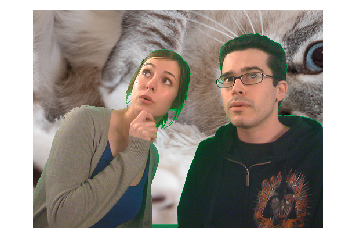

In [9]:
display_1()

## Question 2

Perform unsharp masking on a greyscale image of your own choosing. You will observe that the output
image may contain values outside [0, 255]. Why is that? What would be better — to scale all the intensities
of the output, or to simply truncate only those values outside the interval?

Original picture:


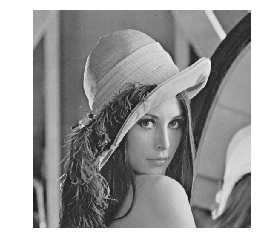

Smoothed with Gaussian filter:


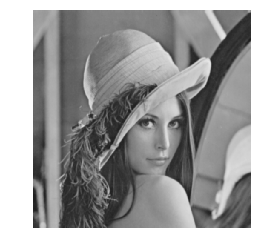

Mask:


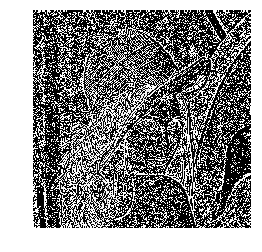

Final Result:


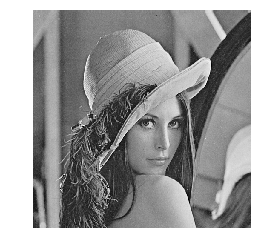

In [45]:
display_2()

What would be better — to scale all the intensities of the output, or to simply truncate only those values outside the interval?

TODO

## Question 3

Create a function that will take a colour image as input and scale (resize) it by a given factor s. Implement
both nearest neighbour (NN) and bilinear (BL) interpolation. Pick a colour image as input and show a
handful of results for different s, using both NN and BL interpolation. Show at least one close-up where
the difference between NN and BL is clear.

### Nearest Neighbour

Scale = 3.1
Starting Nearest Neighbour
Done resizing


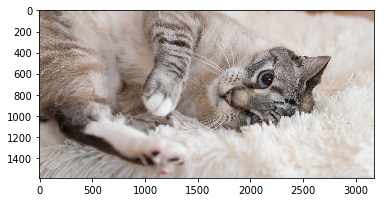

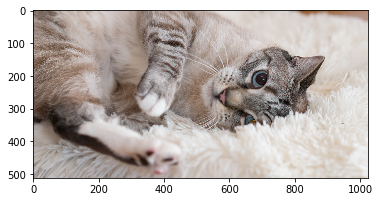

Scale = 10
Starting Nearest Neighbour
Done resizing


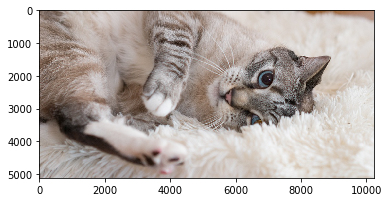

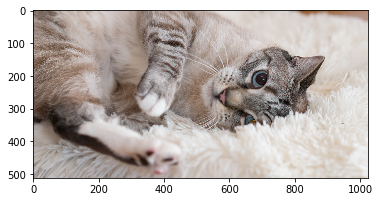

Scale = 0.9
Starting Nearest Neighbour
Done resizing


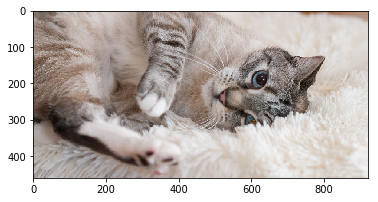

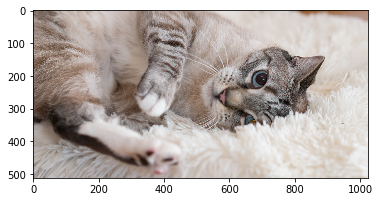

Scale = 0.1
Starting Nearest Neighbour
Done resizing


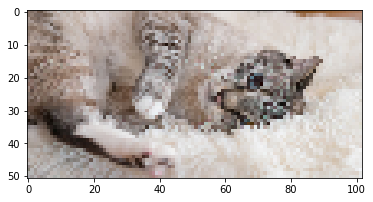

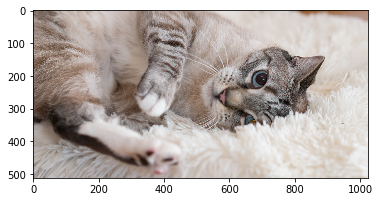

In [20]:
cat_nn = display_3_nn()

### Bilinear Interpolation

Scale = 3.1
Starting Bilinear Interpolation
Done resizing


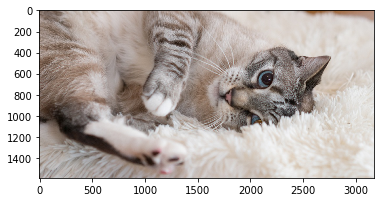

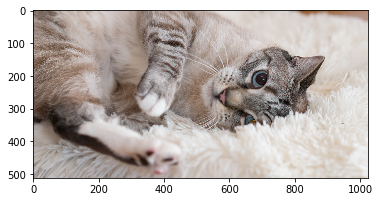

Scale = 10
Starting Bilinear Interpolation
Done resizing


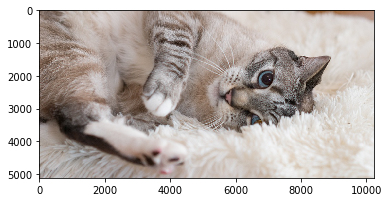

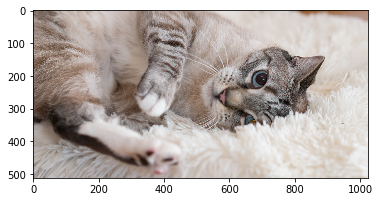

Scale = 0.9
Starting Bilinear Interpolation
Done resizing


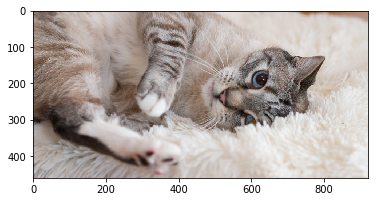

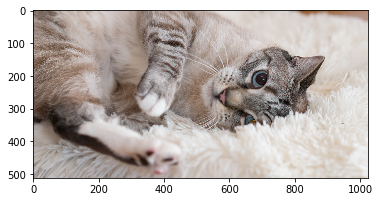

Scale = 0.1
Starting Bilinear Interpolation
Done resizing


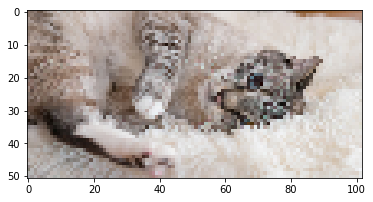

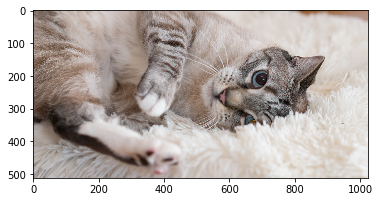

In [21]:
cat_bl = display_3_bl()

### Comparison
To compare how the two methods of interpolation result in very different final images, we will take the eyeball of this cat after being scaled by x3.1.

Nearest Neighbour Interpolation:


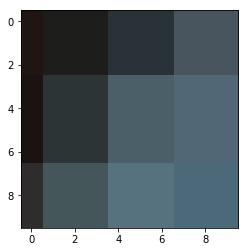

Bilinear Interpolation:


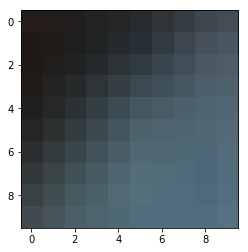

In [28]:
compare_nn_bl()

## Question 4a
Find, download and/or install any decent image feature detector and matcher (for example SIFT,
SURF, FAST, BRIEF or ORB). There are many resources to choose from, including:
* various options in the feature module in scikit-image;
* the extractFeatures function in MATLAB (requires the Computer Vision System Toolbox);
* the features2d and xfeatures2d modules in OpenCV;
* Edward Rosten’s FAST corners (for Python, MATLAB, C, etc.).
Wrap the chosen modules/functions so that you can easily (1) get a list of feature coordinates and
corresponding descriptor vectors from a single image, and (2) match two sets of descriptors from two
images. Include a short description of your chosen method, cite your source(s), and explain what you
did to get it to perform the two separate tasks above.

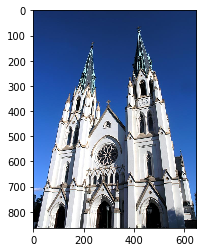

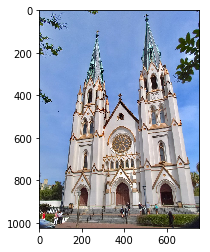

In [69]:
orb = cv2.ORB_create()

cathedral = cv2.imread('cathedral.jpg')
cathedral = cv2.cvtColor(cathedral, cv2.COLOR_BGR2RGB)
cathedral_1 = cv2.imread('cathedral1.jpg')
cathedral_1 = cv2.cvtColor(cathedral_1, cv2.COLOR_BGR2RGB)

plt.imshow(cathedral)
plt.show()
plt.imshow(cathedral_1)
plt.show()

Starting Bilinear Interpolation
Done resizing


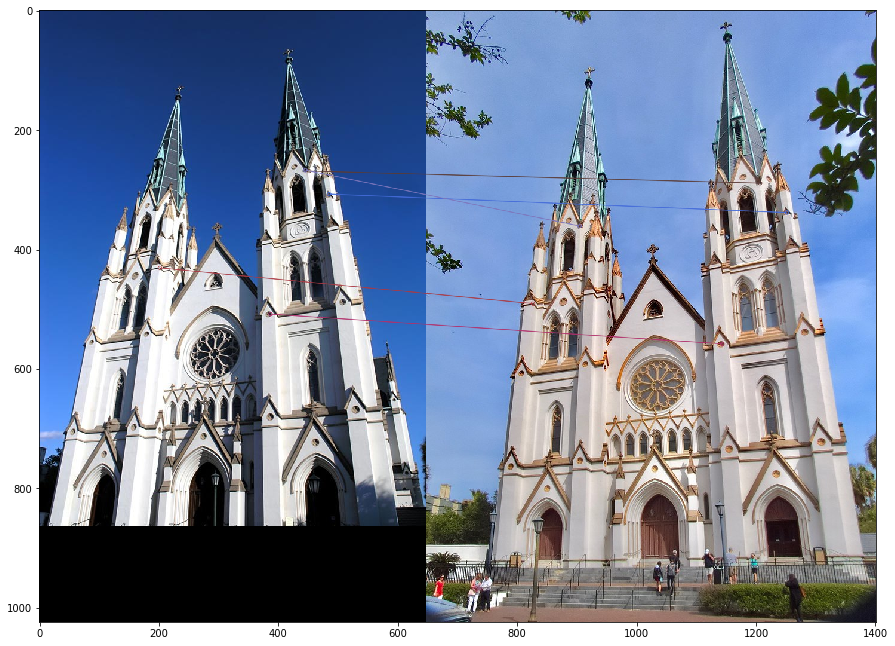

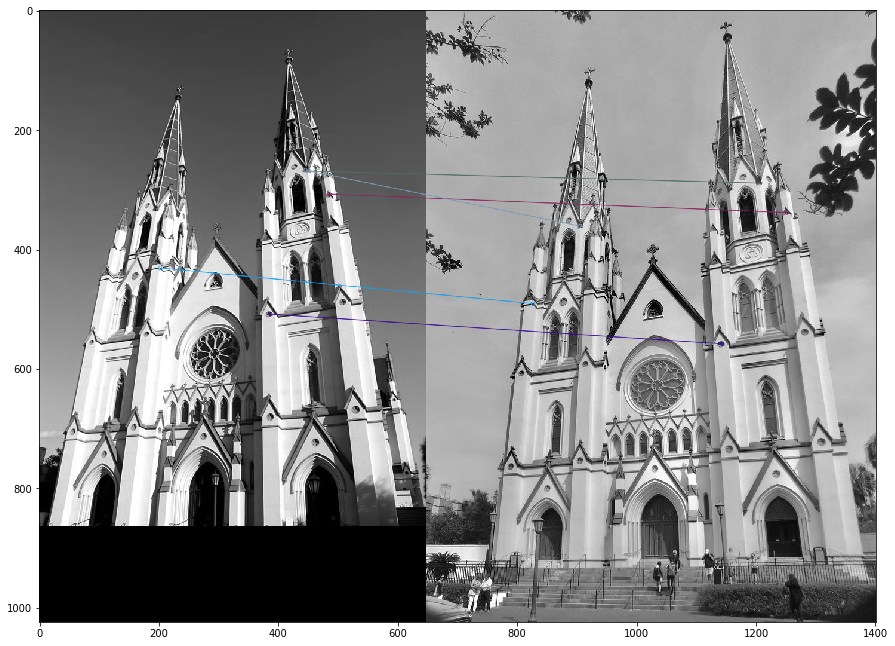

In [93]:
# Sources
# https://www.kaggle.com/wesamelshamy/tutorial-image-feature-extraction-and-matching
# https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_matcher/py_matcher.html

def detect_colour(detector, image):
    kp, des = detector.detectAndCompute(image, None)
    return image, kp, des

def detect_greyscale(detector, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    kp, des = detector.detectAndCompute(image, None)
    return image, kp, des

    
def draw_matches(detector, image1, image2, nmatches=5):
    img1, kp1, des1 = detect_colour(detector, image1)
    img2, kp2, des2 = detect_colour(detector, image2)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance)
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:nmatches], img2, flags=2)
    plt.figure(figsize=(15, 15))
    plt.imshow(img_matches)
    plt.show()
    
    img1, kp1, des1 = detect_greyscale(detector, image1)
    img2, kp2, des2 = detect_greyscale(detector, image2)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance)
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:nmatches], img2, flags=2)
    plt.figure(figsize=(15, 15))
    plt.imshow(img_matches)
    plt.show()
    

orb = cv2.ORB_create()
cat_small = bl_resize(cat, 0.3)
# draw_matches(orb, cat, cat_small)
draw_matches(orb, cathedral, cathedral_1)

## Question 4b
Now find and match features in semper0.jpg and semper1.jpg. Put some effort into picking pa-
rameter values that produce good results. Use dots and short line segments over one of the images
to visualize features and matches (as discussed in class).